In [417]:
from __future__ import division
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#Data Preprocessing

In [418]:
raw_data = pd.read_csv('clicks_hashed.csv').rename(columns={'Click time': 'ts',
                                                        'Ad id': 'ad', 
                                                        'Advertiser id': 'advertiser',
                                                        'Site id': 'site',
                                                        'User id': 'user',
                                                        'User IP': 'ip'})

In [419]:
raw_data.head()

,id,ts,ad,advertiser,site,user,ip
0,0,1406977042,a3fbcd7e4b6362c75ab56687116a2433,510885b9a863ce0bd84b2ed3e58398f9,f9f32862920f6ca00c9725eade88f3d9,36b51acc9d3250851d0c0114aa04cc46,b1c7ac8696898d6f799e2f64c94156e6
1,1,1406977012,8683b0a8e3b4cac34cb40821e498ccdc,78ee95b2e2a854b40c714656b3f4321f,aa8e410642c0a8b95c53ea98a45c90b2,c6b363b3302908d1d6046d080df839e4,fd5cc76d2bfe24099c8777d557524b45
2,2,1406976966,8f8670b832c00cfd8493bca779aba942,e4551b0407c1cd88b24d367fc1ba4c5a,67877aff2349aa3053210af23632428f,0f2918a022fde0225b535988734461c4,39db42ae552c7c52dff1eb45d097bcab
3,3,1406976910,3437653362b4fab85ca9e147230208c5,478fb38eaeca30e36e1394411b2282a2,67877aff2349aa3053210af23632428f,bc605147700345892e6307ddfb4dedb6,10aa7a94cd916c9c6c1fa8c4cf22c92d
4,4,1406976857,a7e94defddbea68fb8cbc0885829a8b2,fcf373d8127ff67ac5501de0f6f80ec3,d2373599997dca05b50ade27578b8251,c32870919f9270d120cd58d68a957c18,0b0cad9116bb30d043be878866accd40


In [420]:
def get_column_dict(series):
    return dict(map(lambda (x,y): (y,x), enumerate(series.unique())))    

In [421]:
ad_map = get_column_dict(raw_data.ad)
advertiser_map = get_column_dict(raw_data.advertiser)
site_map = get_column_dict(raw_data.site)
user_map = get_column_dict(raw_data.user)
ip_map = get_column_dict(raw_data.ip)

In [422]:
data = raw_data.copy().sort(['ip', 'user', 'ts'])
data['ts'] = raw_data.ts.map(lambda ts: pd.to_datetime(ts, unit='s'))
data['ad'] = raw_data.ad.map(ad_map)
data['advertiser'] = raw_data.advertiser.map(advertiser_map)
data['site'] = raw_data.site.map(site_map)
data['user'] = raw_data.user.map(user_map)
data['ip'] = raw_data.ip.map(ip_map)

In [423]:
data.tail(20)

,id,ts,ad,advertiser,site,user,ip
262500,262500,2014-07-31 14:29:52,182,40,21,208156,183343
489647,489647,2014-07-30 05:29:23,2064,1,7,78748,315908
427439,427439,2014-07-30 13:42:13,310,170,0,328396,281241
523483,523483,2014-07-29 21:08:00,6327,2210,2,48115,45708
57310,57310,2014-08-01 19:17:39,91,1,2,48115,45708
463585,463585,2014-07-30 10:04:20,3879,1145,33,333388,285149
434593,434593,2014-07-30 12:32:04,7378,2546,122,333388,285149
511975,511975,2014-07-30 05:28:57,2556,958,93,388663,328085
405999,405999,2014-07-30 14:48:23,659,4,140,313095,269172
301474,301474,2014-07-31 10:38:16,10501,3455,68,104421,193340


# Data Description

In [424]:
#pd.to_datetime(data.ts.min(), unit='s'), pd.to_datetime(data.ts.max(), unit='s')
data.ts.min(), data.ts.max()

(Timestamp('2014-07-29 21:00:01'), Timestamp('2014-08-02 10:57:53'))

In [425]:
print data.shape
print len(data.ad.unique())
print len(data.advertiser.unique())
print len(data.site.unique())
print len(data.user.unique())
print len(data.ip.unique())

(525422, 7)
13589
4253
984
398276
335612


In [426]:
user_clicks = data.groupby('user').size()
data2 = data[data.user.isin(user_clicks[user_clicks > 5].index)].sort(['ip', 'user', 'ts'])
data2.shape

(39570, 7)

#Suspicous User Behaviour Metrics

In [427]:
# data2.groupby('user').size().order(ascending=False).head(200)

In [428]:
user_metrics = pd.DataFrame()

In [429]:
user_metrics['click_n'] = data2.groupby('user').size()

In [430]:
def get_time_span(start, end):
    return max((end - start).total_seconds() / 60, 1)

In [431]:
user_metrics['avg_clicks_per_min'] = data2.groupby('user').apply(
    lambda df: df.shape[0] / get_time_span(df.ts.min(), df.ts.max()))

In [432]:
# plt.scatter(user_metrics.click_n,
#             user_metrics.clicks_per_min)

In [433]:
user_metrics['max_clicks_per_site'] = data2.groupby(['user', 'site']).size().reset_index().groupby('user')[0].max()

In [434]:
#user_metrics.sort('max_clicks_per_site', ascending=False)

In [435]:
user_metrics['uniq_sites'] = data2.groupby('user').apply(lambda df: df.site.unique().shape[0])

In [436]:
# df = data2[data2.user == 121628]
# df

In [440]:
def sliding_window_clicks_n(tss):
    window_events_n = []
    ws = 10
    window = []
    for ts in tss.order():
#         print ts
        window.append(ts)
        if len(window) > 0:
            i, n, wnd_start = 0, len(window), 0
            while True:
                if i < n:
                    if (window[n-1] - window[i]).total_seconds()/60 > ws:
                        wnd_start = i+1
                        i += 1
                    else:
                        break
            del window[:wnd_start]
#             print window
            window_events_n.append(len(window))

    return pd.Series(window_events_n)

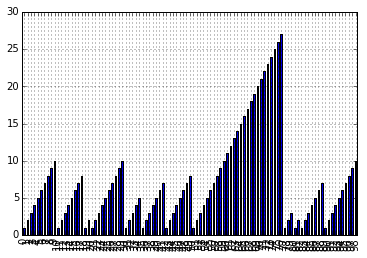

In [457]:
# pd.Series(sliding_window_clicks_n(data2[data2.user == 36].ts)).plot(kind='bar')
# pd.Series(sliding_window_clicks_n(data2[data2.user == 22078].ts)).plot(kind='bar')
# pd.Series(sliding_window_clicks_n(data2[data2.user == 740].ts)).plot(kind='bar')
# pd.Series(sliding_window_clicks_n(data2[data2.user == 181172].ts)).plot(kind='bar')
pd.Series(sliding_window_clicks_n(data2[data2.user == 93795].ts)).plot(kind='bar')

In [445]:
user_metrics['max_clicks_per_10m_slot'] = data2.groupby('user').apply(
    lambda df: sliding_window_clicks_n(df.ts).max())

In [462]:
user_metrics.sort('max_clicks_per_10m_slot', ascending=False).head(10)

,click_n,avg_clicks_per_min,max_clicks_per_site,uniq_sites,max_clicks_per_10m_slot
user,,,,,
740,333,0.064955,289,2,48
302214,66,1.502276,66,1,43
85986,182,0.045446,178,3,43
181172,36,0.017090,36,1,35
226009,56,0.044431,52,2,34
39412,78,0.021660,76,2,29
395947,54,1.680498,54,1,27
93795,99,0.025489,99,1,27
303543,40,2.446483,40,1,26


In [501]:
def get_user_penalties(ser, asc):
    #print ser
    pen_dict = {}
    prev = None
    for i,(u,v) in enumerate(ser.order(ascending=asc).iterkv()):
        if v != prev:
            penalty, prev = i, v
        pen_dict[u] = penalty
    return pd.Series(pen_dict)

In [519]:
user_penalties = user_metrics.copy()
for col, asc in zip(user_metrics.columns, [True, True, True, False, True]):
    user_penalties[col] = get_user_penalties(user_metrics[col], asc)
print user_penalties.shape
user_penalties

(3756, 5)


,click_n,avg_clicks_per_min,max_clicks_per_site,uniq_sites,max_clicks_per_10m_slot
user,,,,,
27,1177,98,1671,1343,0
36,3751,2313,3752,1343,2616
52,3478,1362,3503,1343,879
102,1819,1687,43,260,208
210,0,96,43,260,1544
320,0,71,643,644,208
323,3239,1615,3041,644,879
411,3665,1883,3670,1343,2616
430,2255,333,2487,1343,0


In [534]:
quantile = int(np.round(user_metrics.shape[0]*0.2))
print quantile
top20perc_users = user_penalties.mean(axis=1).order().tail(quantile)
top20perc_users.index

751


Int64Index([68262, 137796, 57596, 125654, 4292, 229582, 207760, 125478, 212686, 154516, 271607, 215145, 84988, 304807, 171439, 237440, 112718, 44593, 119202, 72501, 28073, 68979, 59326, 291208, 73280, 70031, 4609, 238741, 310719, 365703, 43132, 356751, 20723, 298752, 7999, 157805, 161597, 319785, 354914, 57727, 134372, 342060, 6709, 60604, 158190, 182848, 62549, 7606, 164827, 183012, 395254, 382558, 231735, 206472, 49089, 9316, 221564, 83532, 173869, 63980, 48644, 90351, 27012, 33444, 27761, 300795, 123025, 269424, 49049, 242939, 219845, 23074, 229415, 69928, 73049, 45433, 242992, 298776, 65682, 233618, 41779, 75463, 184618, 273770, 34502, 164098, 328657, 101899, 59856, 128352, 249671, 167129, 100378, 95311, 511, 189691, 237766, 282975, 117850, 269619, ...], dtype='int64')

In [549]:
data['suspicious_user'] = data.user.isin(top20perc_users.index)

In [552]:
print data['suspicious_user'].sum() / data['suspicious_user'].shape[0]
print data.shape
data['suspicious_user'].head()

0.0300425182044
(525422, 8)


429523    False
115918    False
352104    False
365684    False
355763    False
Name: suspicious_user, dtype: bool

# Interclick Span Distribution

In [270]:
def get_intervals(tss):
    n = len(tss)-1
    tss2 = tss.copy()
    tss2.sort('ts')
    span1 = tss2.iloc[1:]
    span2 = tss2.iloc[:-1]
    return [(span1.iloc[i] - span2.iloc[i]).total_seconds()/60 for i in range(n)]

In [281]:
#df = data2[data2.user == 16060]
click_intervals = pd.Series(np.hstack(data2.groupby('user').apply(lambda df: get_intervals(df.ts)).values))
click_intervals.head()

0     210.766667
1     161.266667
2      44.516667
3    1275.883333
4      59.333333
dtype: float64

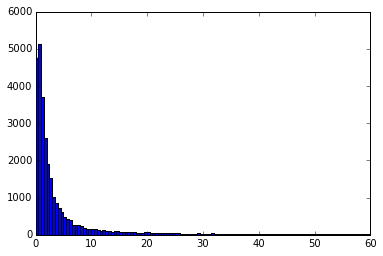

In [464]:
plt.hist(click_intervals[click_intervals<60].values, bins=120);

In [286]:
click_intervals.shape[0], click_intervals[click_intervals<10].shape[0]

(35814, 25657)

#Suspicous IP Behaviour Metrics

In [295]:
data2.groupby('ip').apply(lambda df: df.user.unique().shape[0]).order(ascending=False).head(10)

ip
18998    6
84804    6
3984     5
517      5
206      4
46298    3
46988    3
4530     3
37366    3
1672     3
dtype: int64

In [294]:
data2[data2.ip == 517].sort(['user', 'ts'])

,id,ts,ad,advertiser,site,user,ip
272385,272385,2014-07-31 13:21:20,595,1,0,17732,517
272383,272383,2014-07-31 13:22:08,7603,2605,0,17732,517
272358,272358,2014-07-31 13:31:28,2058,1,0,17732,517
272352,272352,2014-07-31 13:31:58,402,105,0,17732,517
272351,272351,2014-07-31 13:32:32,10123,3356,0,17732,517
246796,246796,2014-07-31 15:28:47,6327,2210,0,17732,517
26065,26065,2014-08-02 06:37:17,3222,1197,0,17732,517
26061,26061,2014-08-02 06:38:42,1633,57,0,17732,517
26060,26060,2014-08-02 06:39:09,1493,57,0,17732,517
26057,26057,2014-08-02 06:44:06,91,1,0,17732,517
